In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, RidgeClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

In [2]:
# Загрузка данных
df = pd.read_csv('./data/winequality-red.csv')

In [3]:
# 1. Обзор данных
print("Основная информация о данных:")
print(df.info())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
# Статистическое описание данных
print("\nСтатистическое описание данных:")
df.describe()


Статистическое описание данных:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
# Проверка на пропуски
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())


Количество пропущенных значений в каждом столбце:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Figure size 1200x1000 with 0 Axes>

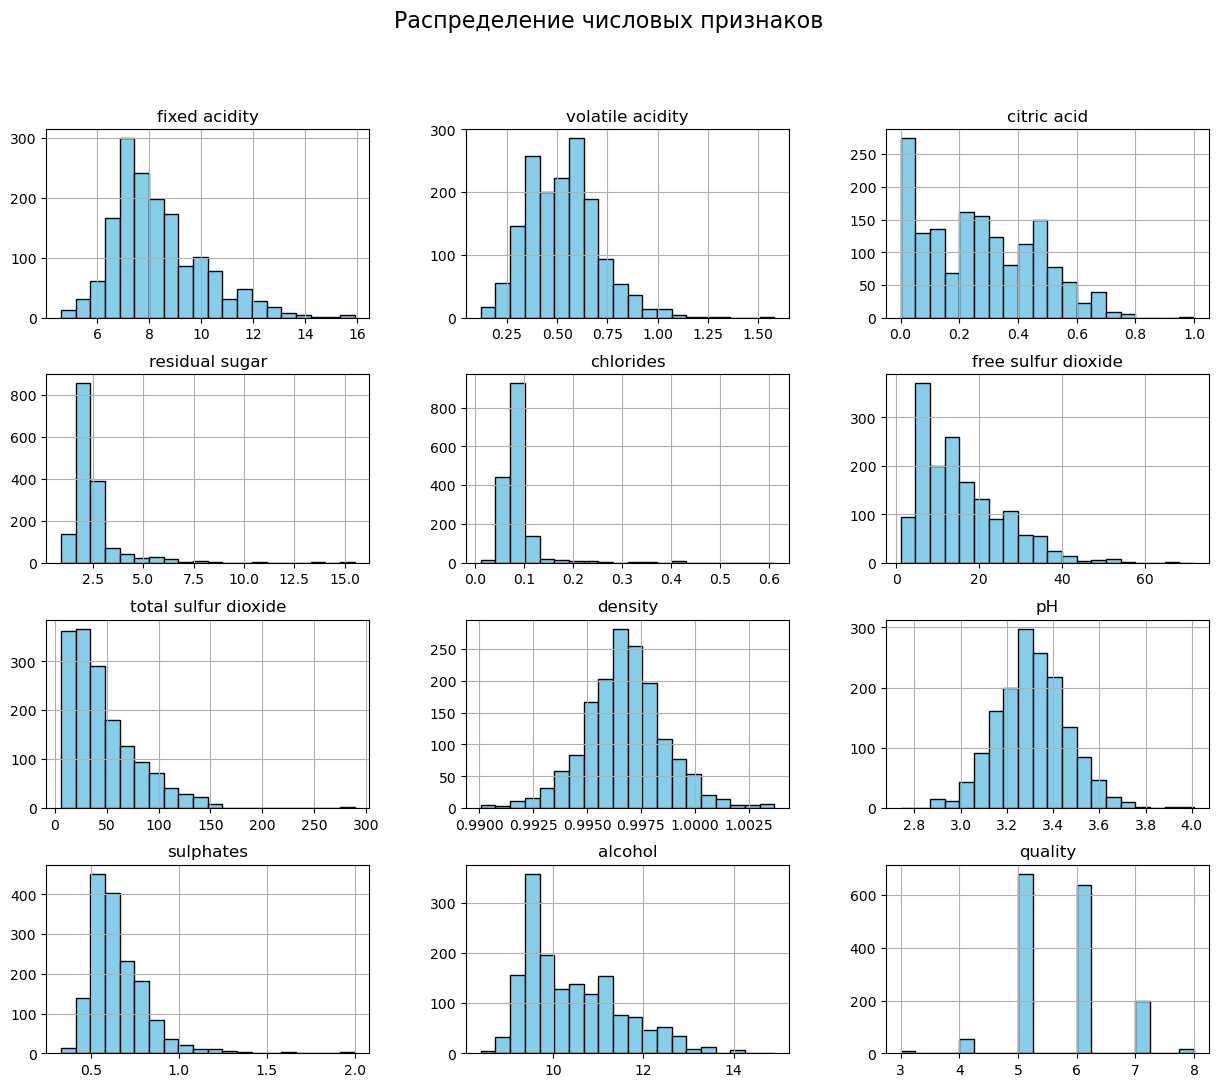

In [6]:
# Визуализация распределения признаков
plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.show()

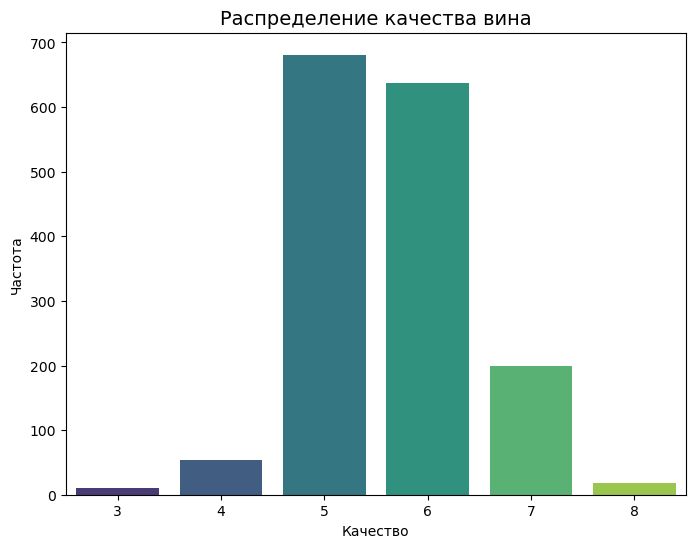

In [7]:
# Гистограмма для целевой переменной (качественные категории)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='quality', palette='viridis')
plt.title('Распределение качества вина', fontsize=14)
plt.xlabel('Качество')
plt.ylabel('Частота')
plt.show()

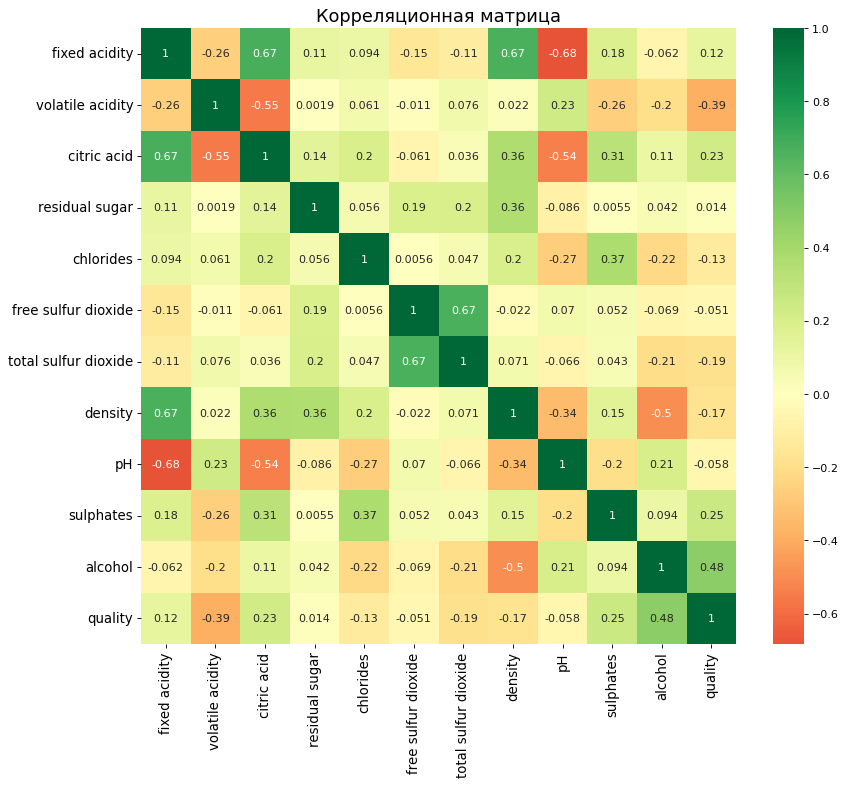

In [8]:
# 5. Корреляция между признаками
plt.figure(figsize=(12, 10), dpi=80)
correlation_matrix = df.corr()
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляционная матрица', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/Users/anthony/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


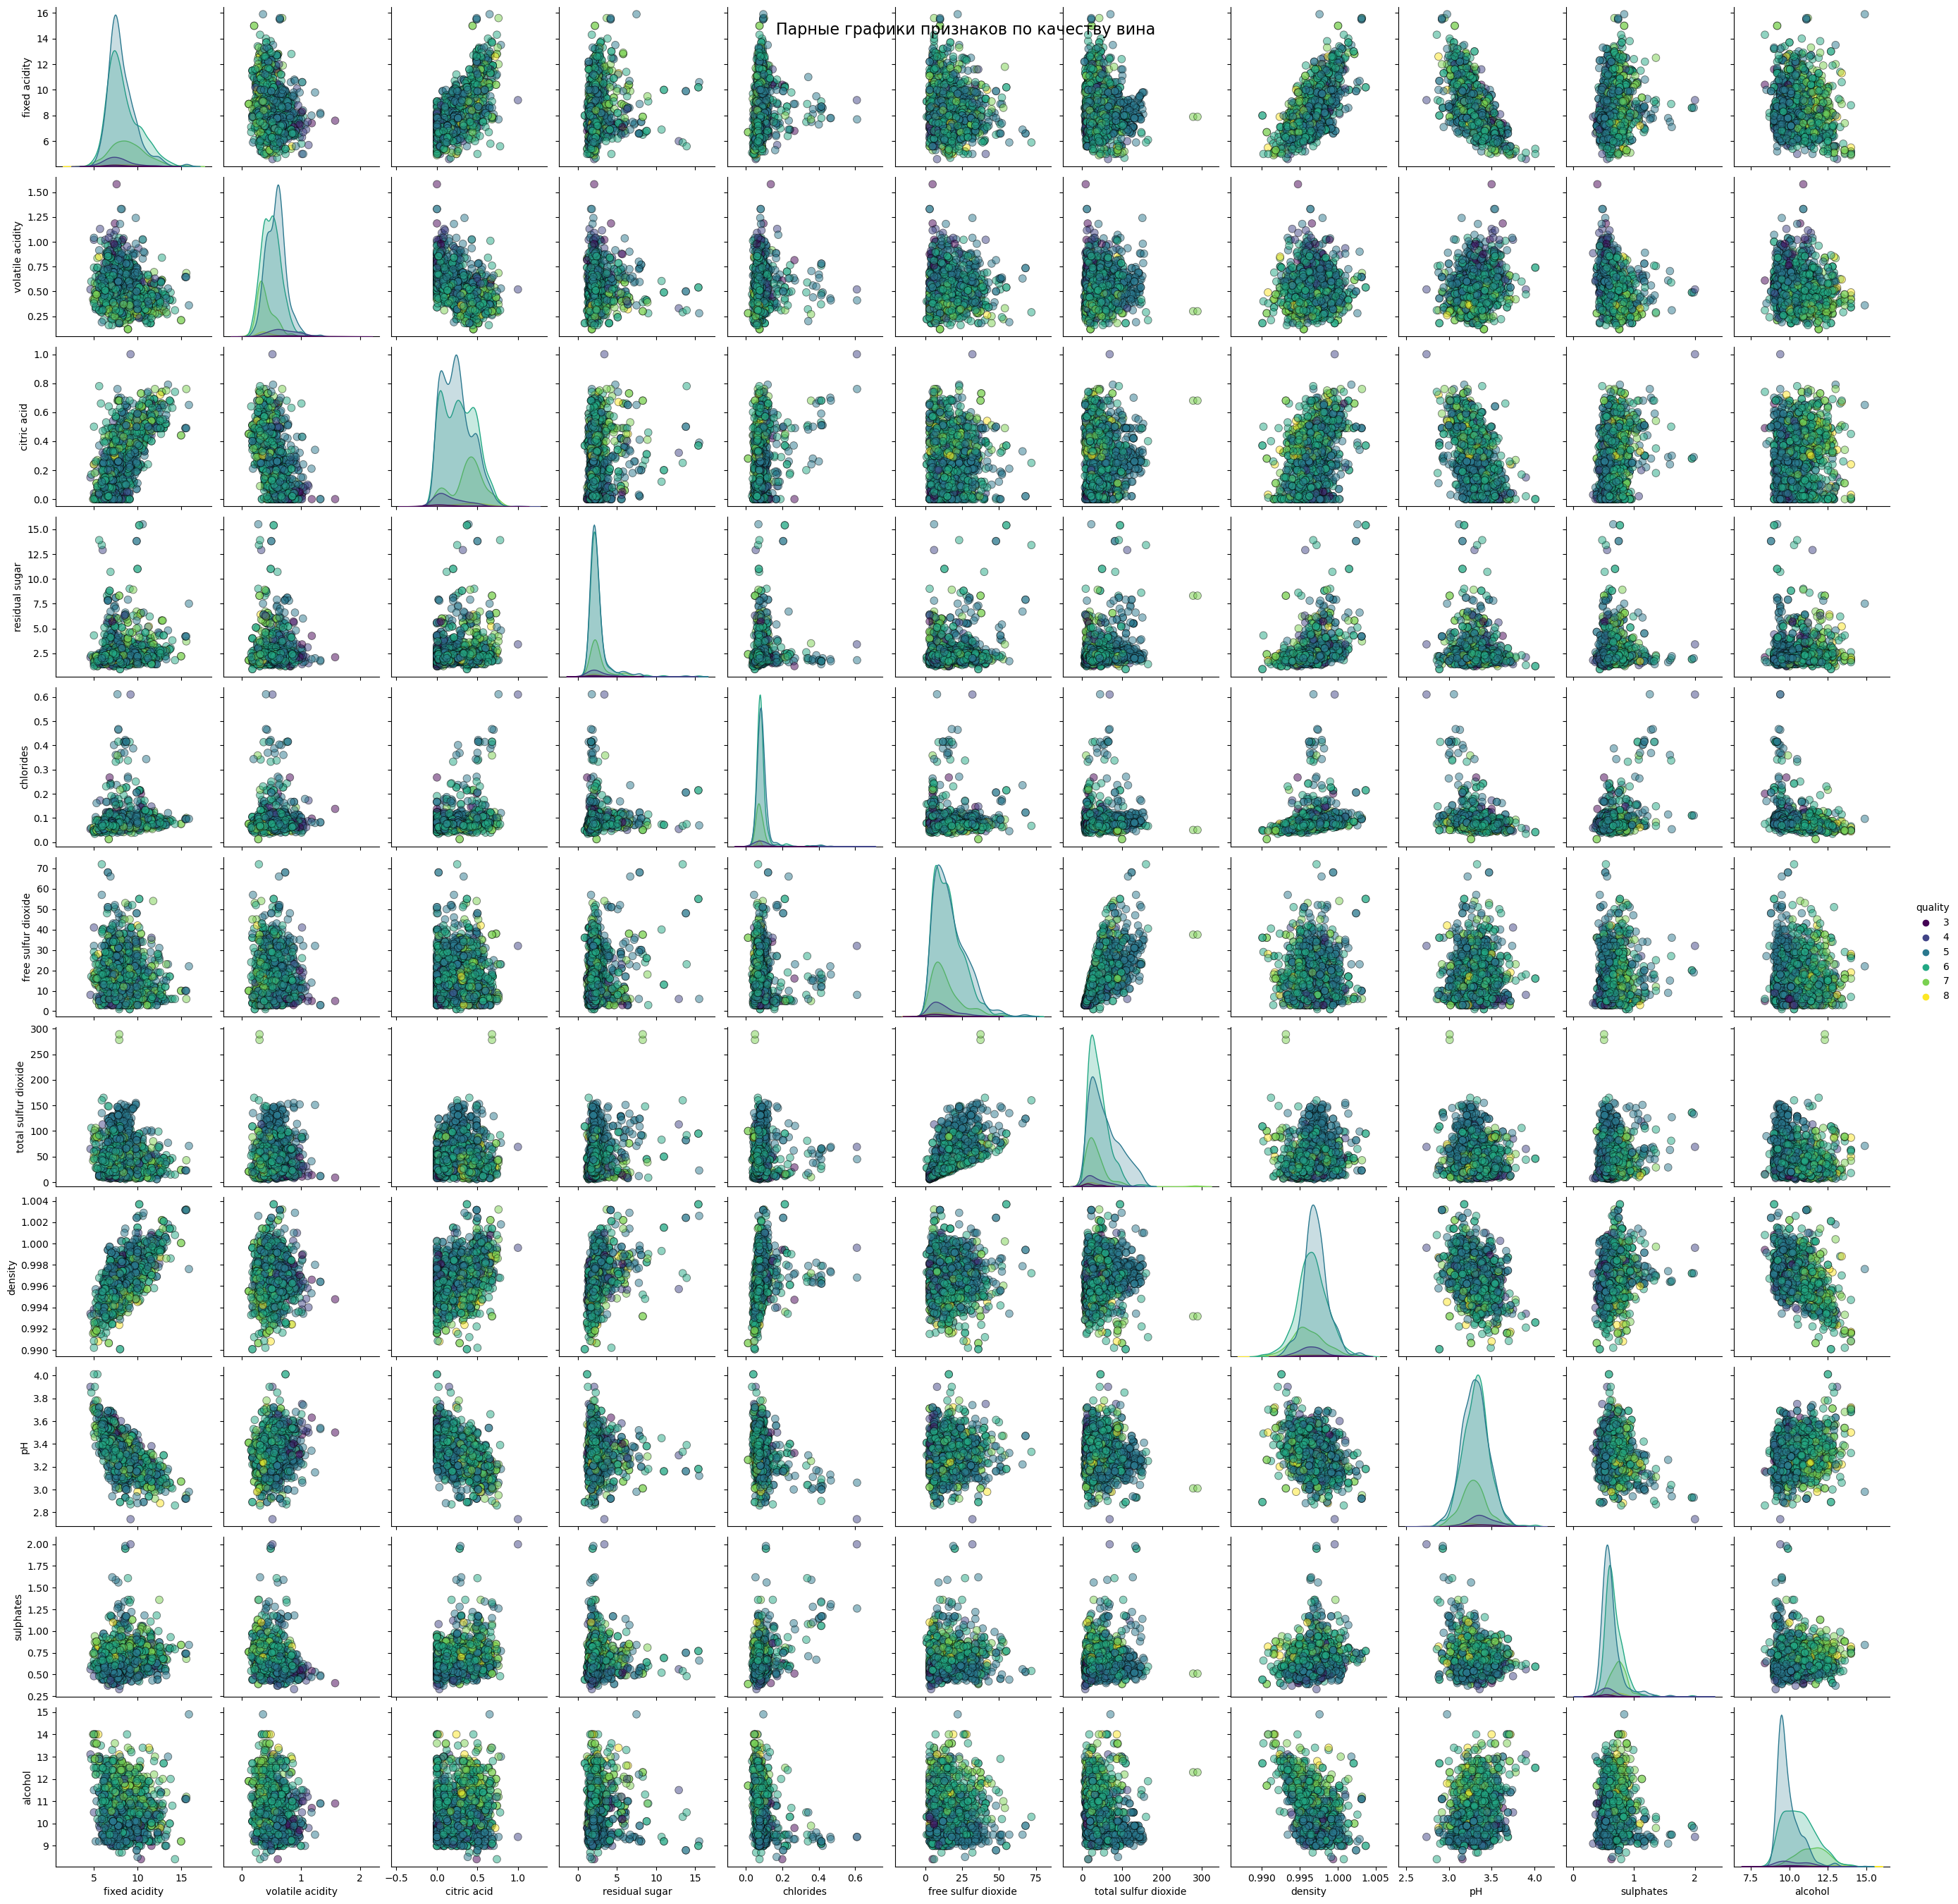

In [9]:
# Парные графики для зависимости признаков
sns.pairplot(df, hue='quality', palette='viridis', plot_kws={'alpha':0.5, 's':60, 'edgecolor':'k'})
plt.suptitle("Парные графики признаков по качеству вина", fontsize=16)
plt.show()

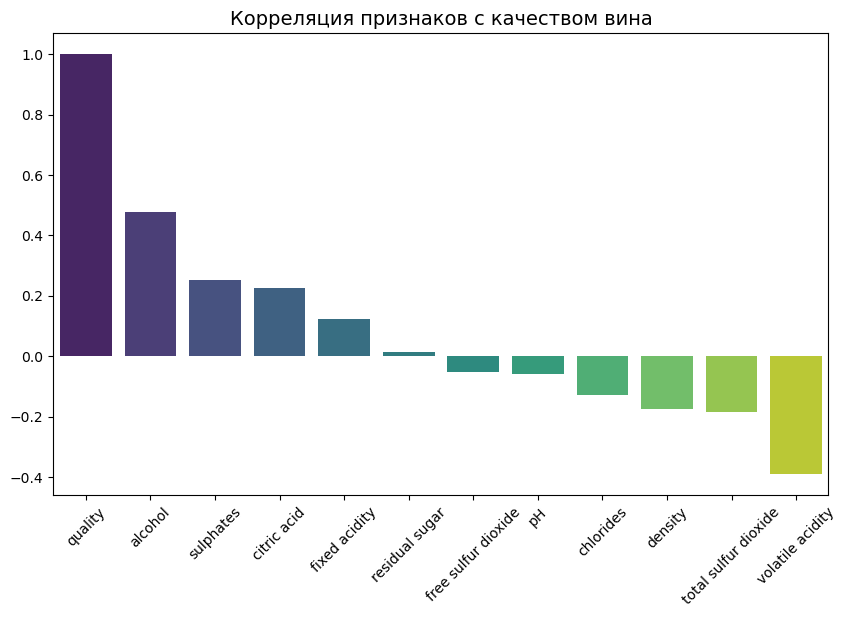

In [10]:
# Корреляция между признаками и целевой переменной (для числовых признаков)
plt.figure(figsize=(10, 6))
corr_with_target = df.corr()['quality'].sort_values(ascending=False)
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='viridis')
plt.title('Корреляция признаков с качеством вина', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [12]:
# ========== ПОДГОТОВКА ДАННЫХ ДЛЯ РЕГРЕССИИ ==========

In [13]:
# Разделим данные на признаки и целевую переменную
X = df.drop(columns=['quality'])
y = df['quality']

In [14]:
# Разделим на обучающую и тестовую выборки ДО масштабирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Масштабируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# ========== ПРОСТАЯ ЛИНЕЙНАЯ РЕГРЕССИЯ (демонстрация) ==========

# Простая линейная регрессия между двумя переменными
X_simple = df[['fixed acidity']]
y_simple = df['citric acid']

linear_simple = LinearRegression()
linear_simple.fit(X_simple, y_simple)

print(f"Коэффициент наклона: {linear_simple.coef_[0]:.4f}")
print(f"Смещение: {linear_simple.intercept_:.4f}")

Коэффициент наклона: 0.0752
Смещение: -0.3543


/Users/anthony/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


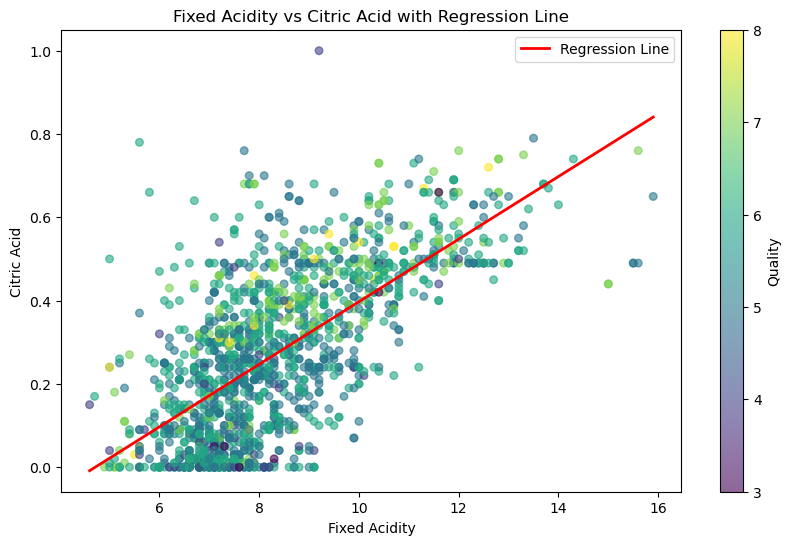

In [17]:
# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(x=df['fixed acidity'], 
            y=df['citric acid'], 
            c=df['quality'], 
            s=30, 
            cmap='viridis', 
            alpha=0.6)

# Добавляем линию регрессии
x_line = np.linspace(df['fixed acidity'].min(), df['fixed acidity'].max(), 100)
y_line = linear_simple.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Regression Line')

plt.colorbar(label='Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.title('Fixed Acidity vs Citric Acid with Regression Line')
plt.legend()
plt.show()

In [ ]:
# ========== РЕГРЕССИОННЫЕ МОДЕЛИ (4 модели) ==========

# Модель 1: Обычная линейная регрессия
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)  # Обучаем на масштабированных данных

# ПРЕДСКАЗАНИЯ и АНАЛИЗ ОШИБОК
y_predict = linear.predict(X_test_scaled)  # Предсказания на тестовых данных
y_true = y_test  # Истинные значения

# Получаем коэффициенты и смещение
coef = linear.coef_  # Углы наклона (коэффициенты для каждого признака)
intercept = linear.intercept_  # Смещение

print(f"\nКоэффициенты модели (углы наклона):")
for i, feature in enumerate(X.columns):
    print(f"{feature:25}: {coef[i]:.4f}")
print(f"Смещение (intercept): {intercept:.4f}")



Коэффициенты модели (углы наклона):
fixed acidity            : 0.0398
volatile acidity         : -0.1794
citric acid              : -0.0275
residual sugar           : 0.0094
chlorides                : -0.0891
free sulfur dioxide      : 0.0580
total sulfur dioxide     : -0.1200
density                  : -0.0192
pH                       : -0.0606
sulphates                : 0.1468
alcohol                  : 0.2966
Смещение (intercept): 5.6239


In [19]:
# Вычисляем ошибки
err = y_true.values - y_predict  # Ошибки предсказаний
new_list = list(err)  # Преобразуем в список

# Выводим статистику по ошибкам
print(f"\nСтатистика ошибок предсказаний:")
print(f"Средняя ошибка: {np.mean(err):.4f}")
print(f"Стандартное отклонение: {np.std(err):.4f}")
print(f"Минимальная ошибка: {np.min(err):.4f}")
print(f"Максимальная ошибка: {np.max(err):.4f}")
print(f"Первые 5 ошибок: {new_list[:5]}")


Статистика ошибок предсказаний:
Средняя ошибка: 0.0330
Стандартное отклонение: 0.6236
Минимальная ошибка: -2.2339
Максимальная ошибка: 1.7561
Первые 5 ошибок: [0.6533355861925951, -0.05631344726345944, 0.3355302808432947, -0.46451484425464074, 0.27481524259866674]


In [20]:
# Модель 2: L1-регрессия (Lasso)
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print(f"\nLasso (L1) MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Lasso (L1) MAE: {mean_absolute_error(y_test, y_pred_lasso):.4f}")



Lasso (L1) MSE: 0.3930
Lasso (L1) MAE: 0.5077


In [21]:
# Модель 3: L2-регрессия (Ridge)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print(f"\nRidge (L2) MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Ridge (L2) MAE: {mean_absolute_error(y_test, y_pred_ridge):.4f}")


Ridge (L2) MSE: 0.3900
Ridge (L2) MAE: 0.5036


In [22]:
# Модель 4: SVR
svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print(f"\nSVR MSE: {mean_squared_error(y_test, y_pred_svr):.4f}")
print(f"SVR MAE: {mean_absolute_error(y_test, y_pred_svr):.4f}")


SVR MSE: 0.3966
SVR MAE: 0.5007


In [23]:
# Сводная таблица результатов регрессии
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso (L1)', 'Ridge (L2)', 'SVR'],
    'MSE': [
        mean_squared_error(y_test, y_predict),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_svr)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_predict)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr))
    ],
    'MAE': [
        mean_absolute_error(y_test, y_predict),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_svr)
    ]
})

print("\n--- Сводная Таблица Результатов РЕГРЕССИИ ---")
print(results.to_string(index=False))


--- Сводная Таблица Результатов РЕГРЕССИИ ---
            Model      MSE     RMSE      MAE
Linear Regression 0.390025 0.624520 0.503530
       Lasso (L1) 0.393015 0.626909 0.507744
       Ridge (L2) 0.390038 0.624530 0.503560
              SVR 0.396634 0.629789 0.500660


In [24]:
# ========== КЛАССИФИКАЦИОННЫЕ МОДЕЛИ (4 модели) ==========

acc_scores_list = []
model_names_list = []

# Создание категориальной целевой переменной
y_class = pd.cut(
    y,
    bins=[0, 5, 7, 10],
    labels=[0, 1, 2]  # low / medium / high
)

# Разделение данных для классификации (используем те же индексы, что и для регрессии)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Масштабирование данных для классификации
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Списки для хранения результатов
acc_scores_list = []
model_names_list = []

In [25]:
# Модель 1: Линейная классификация с L1 (Lasso)
log_l1 = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)
log_l1.fit(X_train_clf_scaled, y_train_clf)
y_pred_l1 = log_l1.predict(X_test_clf_scaled)

current_acc = accuracy_score(y_test_clf, y_pred_l1)
acc_scores_list.append(current_acc)
model_names_list.append('Линейная классификация с L1')
print(f"LogReg L1 Accuracy: {current_acc:.4f}")

LogReg L1 Accuracy: 0.7250


In [26]:
# Модель 2: Линейная классификация с L2
log_l2 = LogisticRegression(penalty='l2', max_iter=1000)
log_l2.fit(X_train_clf_scaled, y_train_clf)
y_pred_l2 = log_l2.predict(X_test_clf_scaled)

current_acc = accuracy_score(y_test_clf, y_pred_l2)
acc_scores_list.append(current_acc)
model_names_list.append('Линейная классификация с L2 (LogReg)')
print(f"LogReg L2 Accuracy: {current_acc:.4f}")

LogReg L2 Accuracy: 0.7219


In [27]:
# Модель 3: RidgeClassifier
ridge_clf = RidgeClassifier(alpha=1.0)
ridge_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_ridge = ridge_clf.predict(X_test_clf_scaled)

current_acc = accuracy_score(y_test_clf, y_pred_ridge)
acc_scores_list.append(current_acc)
model_names_list.append('RidgeClassifier')
print(f"RidgeClassifier Accuracy: {current_acc:.4f}")

RidgeClassifier Accuracy: 0.7312


In [28]:
# Модель 4: SVC (линейный)
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train_clf_scaled, y_train_clf)
y_pred_svc = svc.predict(X_test_clf_scaled)

current_acc = accuracy_score(y_test_clf, y_pred_svc)
acc_scores_list.append(current_acc)
model_names_list.append('SVC (линейный)')
print(f"SVC Accuracy: {current_acc:.4f}")

SVC Accuracy: 0.7281


In [29]:
# Сводная таблица результатов классификации
classification_results = pd.DataFrame({
    'Model': model_names_list,
    'Accuracy': acc_scores_list,
    'Accuracy (%)': [f"{a * 100:.2f}%" for a in acc_scores_list]
})

# Сортируем результаты по убыванию точности
classification_results = classification_results.sort_values(by='Accuracy', ascending=False)

print("\n--- Сводная Таблица Результатов КЛАССИФИКАЦИИ ---")
print(classification_results.to_string(index=False))


--- Сводная Таблица Результатов КЛАССИФИКАЦИИ ---
                               Model  Accuracy Accuracy (%)
                     RidgeClassifier  0.731250       73.12%
                      SVC (линейный)  0.728125       72.81%
         Линейная классификация с L1  0.725000       72.50%
Линейная классификация с L2 (LogReg)  0.721875       72.19%


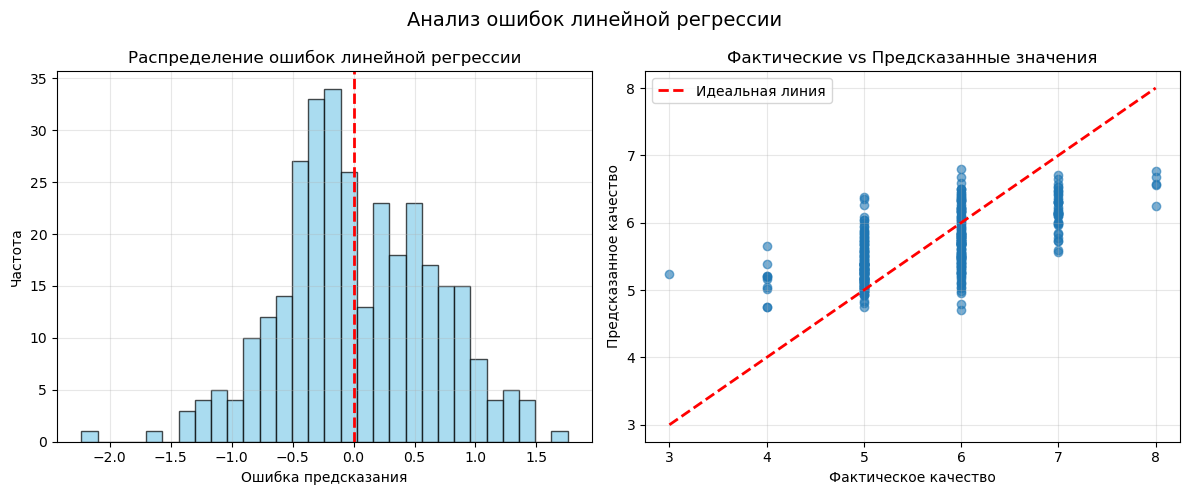

In [30]:
# ========== ВИЗУАЛИЗАЦИЯ ОШИБОК РЕГРЕССИИ ==========

plt.figure(figsize=(12, 5))

# Визуализация 1: Распределение ошибок
plt.subplot(1, 2, 1)
plt.hist(err, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок линейной регрессии')
plt.grid(True, alpha=0.3)

# Визуализация 2: Фактические vs Предсказанные значения
plt.subplot(1, 2, 2)
plt.scatter(y_true, y_predict, alpha=0.6)
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
         'r--', lw=2, label='Идеальная линия')
plt.xlabel('Фактическое качество')
plt.ylabel('Предсказанное качество')
plt.title('Фактические vs Предсказанные значения')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Анализ ошибок линейной регрессии', fontsize=14)
plt.tight_layout()
plt.show()